# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import model_selection, metrics
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# откройте данные: ваш код здесь

data = pd.read_csv('data/spam_or_not_spam.zip', )
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [20]:
# рассчитайте частоты для классов : ваш код здесь
data_for_visual = data['label'].apply(lambda x: 'spam' if x else 'not spam')
print(f"Относительное распределение:\n {data_for_visual.value_counts(normalize=True)}\n")
print(f"Общее количество записей:\n {data_for_visual.value_counts()}")

Относительное распределение:
 label
not spam    0.833333
spam        0.166667
Name: proportion, dtype: float64

Общее количество записей:
 label
not spam    2500
spam         500
Name: count, dtype: int64


In [21]:
# визуализируйте результат: ваш код здесь

fig = px.pie(
    data_for_visual,
    names='label',
    title='Распредедение объема данных в выборке',
    )

fig.show()


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [22]:
# from sklearn.feature_extraction.text import CountVectorizer # лучше вначале

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [23]:
#ваш код здесь
copy_data = data.copy()
copy_data['email'] = copy_data['email'].apply(lambda x: np.NaN if str(x).isspace() else x)

copy_data.dropna(inplace=True)
copy_data.isna().sum()


email    0
label    0
dtype: int64

Переводим данные в векторный вид:

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(copy_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [25]:
#ваш код здесь
print(f"количество признаков =  {X.shape[1]}")

количество признаков =  34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [26]:
#ваш код здесь
y = copy_data.label
print(f"Кол-во строк набора признаков: {X.shape[0]}, кол-во строк целевой переменной: {y.shape[0]}")

Кол-во строк набора признаков: 2997, кол-во строк целевой переменной: 2997


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [27]:
#ваш код здесь
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    train_size=0.75,
    test_size=0.25, 
    stratify=y,
    random_state=42
)


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [28]:
#ваш код здесь
print(f"Средне значение целевой переменной = {round(y_test.mean(), 3)}")

Средне значение целевой переменной = 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [29]:
#ваш код здесь
clnb = ComplementNB(alpha=0.01)
mltnb = MultinomialNB(alpha=0.01)

clnb.fit(X_train, y_train)
y_test_pred_clnb =  clnb.predict(X_test)
y_train_pred_clnb =  clnb.predict(X_train)

mltnb.fit(X_train, y_train)
y_test_pred_mltnb =  mltnb.predict(X_test)
y_train_pred_mltnb =  mltnb.predict(X_train)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [30]:
#ваш код здесь

print('Для модели ComplementNB:')
print(f'Pecision на тренировочной выборке = {metrics.precision_score(y_train, y_train_pred_clnb):.3f}')
print(f'Pecision на тестовой выборке = {metrics.precision_score(y_test, y_test_pred_clnb):.3f}')
print()

print(f'Recall на тренировочной выборке = {metrics.recall_score(y_train, y_train_pred_clnb):.3f}')
print(f'Recall на тестовой выборке = {metrics.recall_score(y_test, y_test_pred_clnb):.3f}')
print()

print(f'Accuracy на тренировочной выборке = {metrics.accuracy_score(y_train, y_train_pred_clnb):.3f}')
print(f'Accuracy на тестовой выборке = {metrics.accuracy_score(y_test, y_test_pred_clnb):.3f}')
print()

print(f'f1-мера на тренировочной выборке = {metrics.f1_score(y_train, y_train_pred_clnb):.3f}')
print(f'f1-мера на тестовой выборке = {metrics.f1_score(y_test, y_test_pred_clnb):.3f}')
print('\n')

print('Для модели MultinomialNB:')
print(f'Pecision на тренировочной выборке = {metrics.precision_score(y_train, y_train_pred_mltnb):.3f}')
print(f'Pecision на тестовой выборке = {metrics.precision_score(y_test, y_test_pred_mltnb):.3f}')
print()

print(f'Recall на тренировочной выборке = {metrics.recall_score(y_train, y_train_pred_mltnb):.3f}')
print(f'Recall на тестовой выборке = {metrics.recall_score(y_test, y_test_pred_mltnb):.3f}')
print()

print(f'Accuracy на тренировочной выборке = {metrics.accuracy_score(y_train, y_train_pred_mltnb):.3f}')
print(f'Accuracy на тестовой выборке = {metrics.accuracy_score(y_test, y_test_pred_mltnb):.3f}')
print()

print(f'f1-мера на тренировочной выборке = {metrics.f1_score(y_train, y_train_pred_mltnb):.3f}')
print(f'f1-мера на тестовой выборке = {metrics.f1_score(y_test, y_test_pred_mltnb):.3f}')

Для модели ComplementNB:
Pecision на тренировочной выборке = 1.000
Pecision на тестовой выборке = 1.000

Recall на тренировочной выборке = 0.997
Recall на тестовой выборке = 0.927

Accuracy на тренировочной выборке = 1.000
Accuracy на тестовой выборке = 0.988

f1-мера на тренировочной выборке = 0.999
f1-мера на тестовой выборке = 0.962


Для модели MultinomialNB:
Pecision на тренировочной выборке = 1.000
Pecision на тестовой выборке = 1.000

Recall на тренировочной выборке = 0.995
Recall на тестовой выборке = 0.919

Accuracy на тренировочной выборке = 0.999
Accuracy на тестовой выборке = 0.987

f1-мера на тренировочной выборке = 0.997
f1-мера на тестовой выборке = 0.958


Нарисуйте ROC-кривую:

Площадь под кривой для модели ComplementNB: 0.964
Площадь под кривой для модели MultinomialNB: 0.960


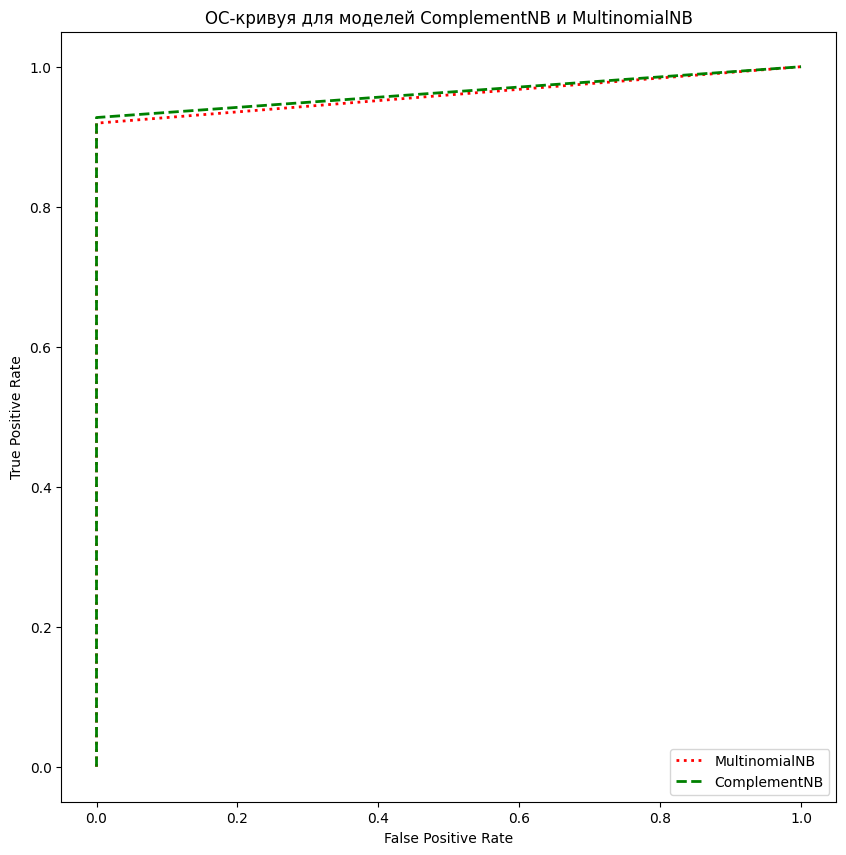

In [31]:
#ваш код здесь
fpr_mltnb, tpr_mltnb, thresholds = metrics.roc_curve(y_test, y_test_pred_mltnb)
fpr_clnb, tpr_clnb, thresholds = metrics.roc_curve(y_test, y_test_pred_clnb)

# Вычислите AUC (площадь под ROC-кривой)
roc_auc_clnb = metrics.roc_auc_score(y_test, y_test_pred_clnb)
roc_auc_mltnb = metrics.roc_auc_score(y_test, y_test_pred_mltnb)

# Постройте ROC-кривую
fig = plt.figure(figsize=(10, 10))

ax = sns.lineplot(
    )
ax.plot(fpr_mltnb, tpr_mltnb, color='red', lw=2, linestyle=':',   
         label='MultinomialNB')

ax.plot(fpr_clnb, tpr_clnb, color='green', lw=2, linestyle='--', 
         label='ComplementNB')

ax.legend(loc="lower right")
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='OC-кривуя для моделей ComplementNB и MultinomialNB');

print(f'Площадь под кривой для модели ComplementNB: {roc_auc_clnb:.3f}')
print(f'Площадь под кривой для модели MultinomialNB: {roc_auc_mltnb:.3f}')

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [32]:
#ваш код здесь
alpha = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5]

precision_list = []
recall_list = []
accuracy_list = []
f1_list = []

for a in alpha:
    cv_results = model_selection.cross_validate(ComplementNB(alpha=a), X, y, scoring=['precision', 'recall', 'accuracy', 'f1'], cv=5)
    precision_list.append(cv_results['test_precision'].mean())
    recall_list.append(cv_results['test_recall'].mean())
    accuracy_list.append(cv_results['test_accuracy'].mean())
    f1_list.append(cv_results['test_f1'].mean())


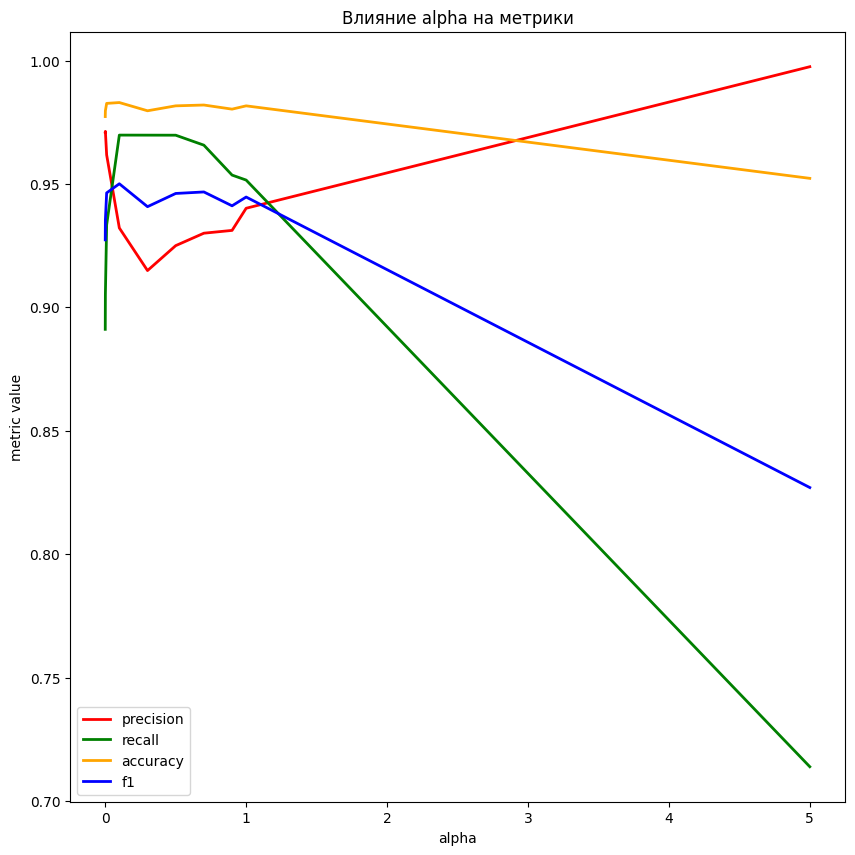

In [35]:
fig = plt.figure(figsize=(10, 10))

ax = sns.lineplot(
    )
ax.plot(alpha, precision_list, color='red', lw=2,   
         label='precision')

ax.plot(alpha, recall_list, color='green', lw=2,
         label='recall')

ax.plot(alpha, accuracy_list, color='orange', lw=2,   
         label='accuracy')

ax.plot(alpha, f1_list, color='blue', lw=2,
         label='f1')

ax.legend(loc="lower left")
ax.set(xlabel='alpha', ylabel='metric value', title='Влияние alpha на метрики');

**Вывод:** Значение alpha имеет влияние на все метрики. Причем увеличение alpha более 1 ведет к стремительному падению recall.  

Попродуем подобрать оптимальную alph для f1 с помощью GridSearchCV.

In [34]:
param_grid = {'alpha': alpha
              }
grid_search = model_selection.GridSearchCV(
    estimator=ComplementNB(
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 

y_test_pred = grid_search.predict(X_test)
print(f'f1_score на тестовом наборе: {metrics.f1_score(y_test, y_test_pred):.3f}')
print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

CPU times: total: 156 ms
Wall time: 3.26 s
f1_score на тестовом наборе: 0.980
Наилучшие значения гиперпараметров: {'alpha': 0.7}


**Вывод:** Значение alpha = 0.7 дало увеличение значения метрики f1 с 0.962 до 0.980 на тестовой выборке.  